In [1]:
#=================================================================
# This first cell contains some necessary initialization commands.
#=================================================================
import sys
sys.path.append('/mnt/local/pyferret/lib/python3.6/site-packages')
import pyferret
import numpy as np
pyferret.addenv(FER_DIR='/mnt/local/pyferret', FER_DAT='/mnt/local/FerretDatasets')
pyferret.start(journal=False, quiet=True, unmapped=True)
%load_ext ferretmagic

In [2]:
%%ferret
use /mnt/research/sgary/aparton/data/storage/LOVECLIM1.3/control_500_yearrun/repo/output/ocean/CLIO3m.001506_001.nc
use /mnt/research/sgary/aparton/data/storage/LOVECLIM1.3/control_500_yearrun/repo/output/ocean/CLIO3a.001506_001.nc
use /mnt/research/sgary/aparton/data/storage/LOVECLIM1.3/ghg2x_500_yearrun/repo/output/ocean/CLIO3m.001506_001.nc
use /mnt/research/sgary/aparton/data/storage/LOVECLIM1.3/ghg2x_500_yearrun/repo/output/ocean/CLIO3a.001506_001.nc


In [3]:
%%ferret
!sh d 

! Enter_GO fland
! Exit_GO


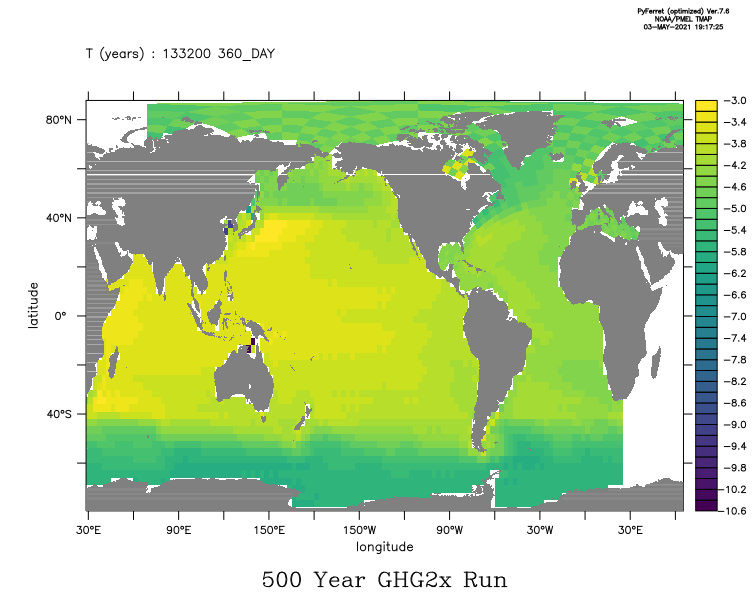

In [4]:
%%ferret
shade /title="500 Year GHG2x Run" SSH[d=2,l=500],tlon,tlat;go fland 

! Enter_GO fland
! Exit_GO


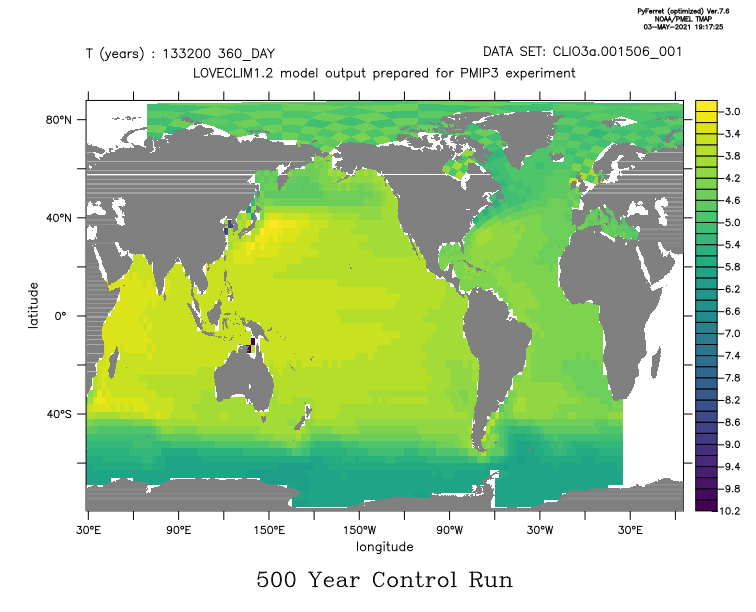

In [5]:
%%ferret
shade /title="500 Year Control Run" ssh[d=4,l=500],tlon,tlat;go fland 

In [6]:
%%ferret
use /mnt/research/sgary/aparton/data/storage/LOVECLIM1.3/control_500_yearrun/repo/output/atmos/atmmmyl001506_001.nc
use /mnt/research/sgary/aparton/data/storage/LOVECLIM1.3/ghg2x_500_yearrun/repo/output/atmos/atmmmyl001506_001.nc



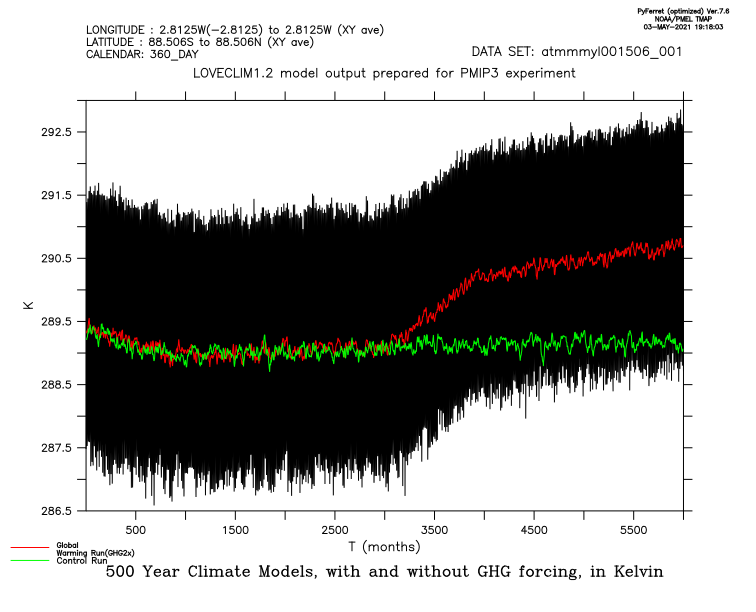

In [8]:
%%ferret
plot /title="500 Year Climate Models, with and without GHG forcing, in Kelvin" ts[x=@AVE,y=@AVE,d=6]
plot /title="Global Warming Run(GHG2x)" /over/color=2 ts[x=@AVE,y=@AVE,l=@SBX:12,d=6]
plot /title="Control Run"/over/color=3 ts[x=@AVE,y=@AVE,l=@SBX:12,d=5]


In [9]:
%%ferret
!control_ts_Celsius = ts[x=@AVE,y=@AVE,l=@SBX:12,d=5] 
!ghg2x_ts_Celsius = ts[x=@AVE,y=@AVE,l=@SBX:12,d=6]


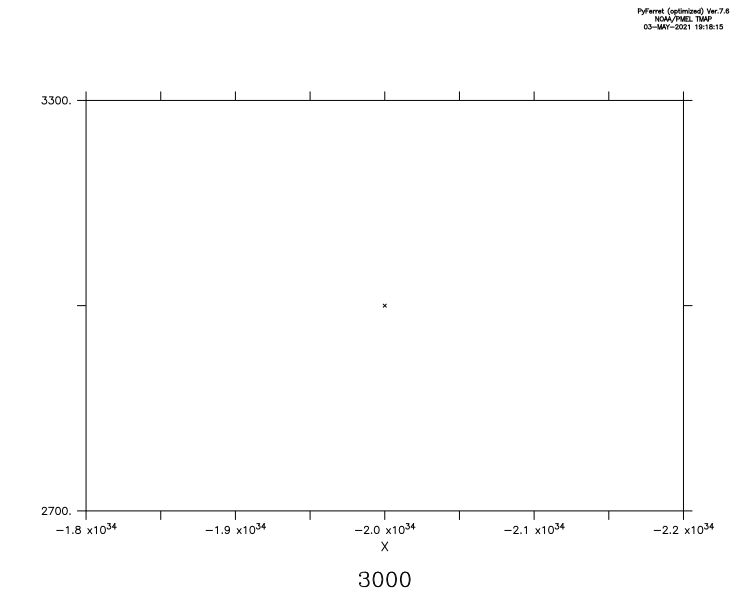

In [10]:
%%ferret
let ghg_start = 3000
plot ghg_start


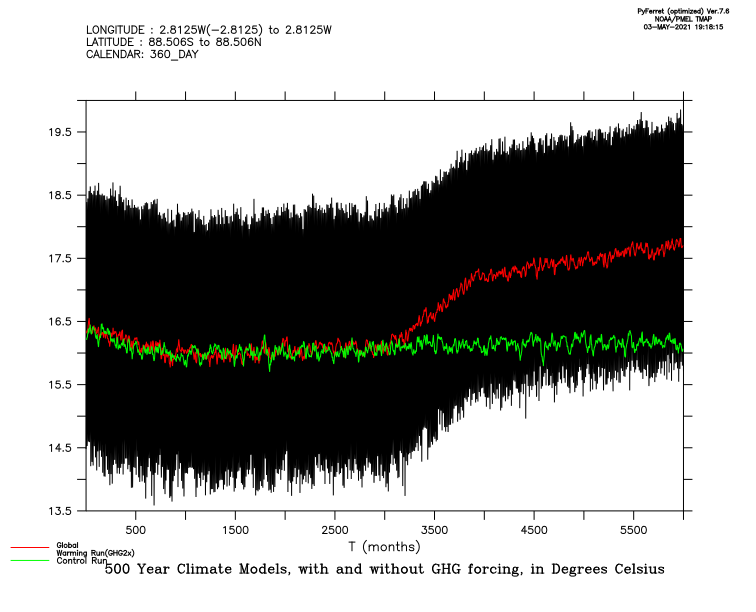

In [11]:
%%ferret
plot /title="500 Year Climate Models, with and without GHG forcing, in Degrees Celsius" ts[x=@AVE,y=@AVE,d=6]-273
plot /title="Global Warming Run(GHG2x)" /over/color=2 ts[x=@AVE,y=@AVE,l=@SBX:12,d=6]-273
plot /title="Control Run"/over/color=3 ts[x=@AVE,y=@AVE,l=@SBX:12,d=5]-273


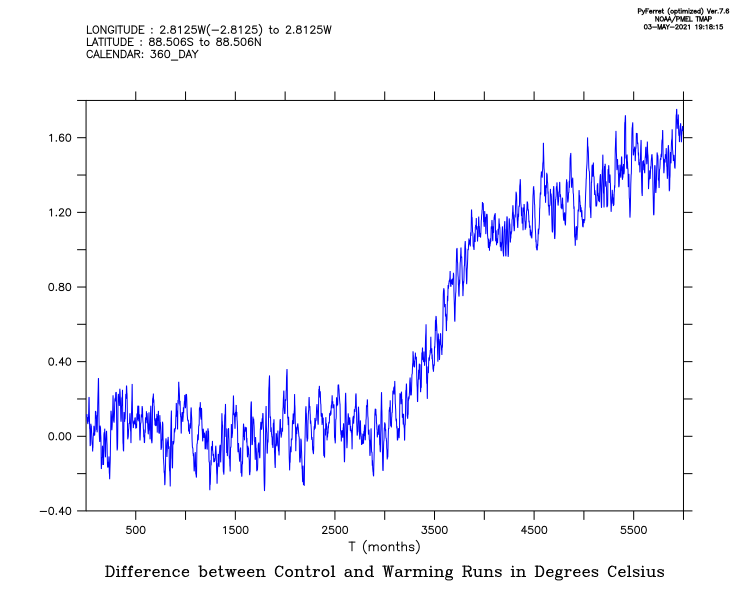

In [12]:
%%ferret 
plot /title="Difference between Control and Warming Runs in Degrees Celsius"/color=4 ts[x=@AVE,y=@AVE,l=@SBX:12,d=6]-ts[x=@AVE,y=@AVE,l=@SBX:12,d=5]


In [13]:
%%ferret
let ghg_start={13.5,14,14.5,15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20.0}


In [14]:
%%ferret
list ghg_start

VARIABLE : {13.5,14,14.5,15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20.0}
 SUBSET : 14 points (X)
 1 / 1: 13.50
 2 / 2: 14.00
 3 / 3: 14.50
 4 / 4: 15.00
 5 / 5: 15.50
 6 / 6: 16.00
 7 / 7: 16.50
 8 / 8: 17.00
 9 / 9: 17.50
 10 / 10: 18.00
 11 / 11: 18.50
 12 / 12: 19.00
 13 / 13: 19.50
 14 / 14: 20.00

In [23]:
%%ferret
sh d

currently SET data sets:
 1> /mnt/research/sgary/aparton/data/storage/LOVECLIM1.3/control_500_yearrun/repo/output/ocean/CLIO3m.001506_001.nc
 name title I J K L
 TLON longitude 1:120 1:65 ... ...
 TLON_BOUNDS
 longitude edges 1:120 1:65 1:4 ...
 TLONP longitude bounds 1:121 1:66 ... ...
 TLAT latitude 1:120 1:65 ... ...
 TLAT_BOUNDS
 latitude edges 1:120 1:65 1:4 ...
 TLATP latitude bounds 1:121 1:66 ... ...
 ULON longitude 1:120 1:65 ... ...
 ULON_BOUNDS
 longitude edges 1:120 1:65 1:4 ...
 ULONP longitude bounds 1:121 1:66 ... ...
 ULAT latitude 1:120 1:65 ... ...
 ULAT_BOUNDS
 latitude edges 1:120 1:65 1:4 ...
 ULATP latitude bounds 1:121 1:66 ... ...
 ANGLE clockwise rotation of x-axis 1:120 1:65 ... ...
 DXS1 zonal length of grid box sides 1:120 1:65 ... ...
 DXS2 meridional length of grid box s 1:120 1:65 ... ...
 DXC1 zonal width at grid box centres 1:120 1:65 ... ...
 DXC2 meridional width at grid box ce 1:120 1:65 ... ...
 AREA surface area of tracer grid box 1:120 1:65 ... ...
 TMASK horizontal tracer grid mask 1:120 1:65 ... ...
 UMASK horizontal momentum grid mask 1:120 1:65 ... ...
 H bathymetry on tracer gridpoints 1:120 1:65 ... ...
 FCOR Coriolis parameter on momentum 1:120 1:65 ... ...
 SST averaged SST 1:120 1:65 ... 1:6000
 SSS averaged sea surface salinity 1:120 1:65 ... 1:6000
 ZCNV averaged depth of convection 1:120 1:65 ... 1:6000
 ALBQ averaged lead fraction 1:120 1:65 ... 1:6000
 
 2> /mnt/research/sgary/aparton/data/storage/LOVECLIM1.3/control_500_yearrun/repo/output/ocean/CLIO3a.001506_001.nc
 name title I J K L
 TLON longitude 1:120 1:65 ... ...
 TLON_BOUNDS
 longitude edges 1:120 1:65 1:4 ...
 TLONP longitude bounds 1:121 1:66 ... ...
 TLAT latitude 1:120 1:65 ... ...
 TLAT_BOUNDS
 latitude edges 1:120 1:65 1:4 ...
 TLATP latitude bounds 1:121 1:66 ... ...
 ULON longitude 1:120 1:65 ... ...
 ULON_BOUNDS
 longitude edges 1:120 1:65 1:4 ...
 ULONP longitude bounds 1:121 1:66 ... ...
 ULAT latitude 1:120 1:65 ... ...
 ULAT_BOUNDS
 latitude edges 1:120 1:65 1:4 ...
 ULATP latitude bounds 1:121 1:66 ... ...
 ANGLE clockwise rotation of x-axis 1:120 1:65 ... ...
 DXS1 zonal length of grid box sides 1:120 1:65 ... ...
 DXS2 meridional length of grid box s 1:120 1:65 ... ...
 DXC1 zonal width at grid box centres 1:120 1:65 ... ...
 DXC2 meridional width at grid box ce 1:120 1:65 ... ...
 AREA surface area of tracer grid box 1:120 1:65 ... ...
 TMASK horizontal tracer grid mask 1:120 1:65 ... ...
 UMASK horizontal momentum grid mask 1:120 1:65 ... ...
 H bathymetry on tracer gridpoints 1:120 1:65 ... ...
 FCOR Coriolis parameter on momentum 1:120 1:65 ... ...
 TEMP averaged potential temperature 1:120 1:65 1:20 1:500
 SALT averaged salinity 1:120 1:65 1:20 1:500
 U averaged zonal velocity compone 1:120 1:65 1:20 1:500
 V averaged meridional velocity co 1:120 1:65 1:20 1:500
 W averaged vertical velocity comp 1:120 1:65 1:21 1:500
 UBAR averaged zonal barotropic momen 1:120 1:65 ... 1:500
 VBAR averaged meridional barotropic 1:120 1:65 ... 1:500
 SSH averaged sea surface height 1:120 1:65 ... 1:500
 SST averaged SST 1:120 1:65 ... 1:500
 SSS averaged sea surface salinity 1:120 1:65 ... 1:500
 SHFLX averaged surface heat flux 1:120 1:65 ... 1:500
 SFFLX averaged surface freshwater flu 1:120 1:65 ... 1:500
 ZMIX averaged depth of ocean surface 1:120 1:65 ... 1:500
 ZCNV averaged depth of convection 1:120 1:65 ... 1:500
 MSL averaged G-M slope 1:120 1:65 ... 1:500
 HICE averaged ice thickness 1:120 1:65 ... 1:500
 HICP averaged ice production 1:120 1:65 ... 1:500
 ALBQ averaged lead fraction 1:120 1:65 ... 1:500
 HSN averaged snow thickness 1:120 1:65 ... 1:500
 SNOW averaged snow precipitation 1:120 1:65 ... 1:500
 TICE averaged ice temperature 1:120 1:65 ... 1:500
 FB averaged heat flux at ice base 1:120 1:65 ... 1:500
 UICE averaged zonal ice velocity 1:120 1:65 ... 1:500
 VICE averaged meridional ice velocit 1:120 1:65 ... 1:500
 WSX averaged zonal wind stress 1:120 1:65 ... 1:500
 WSY averaged meridional w

! Enter_GO fland
! Exit_GO


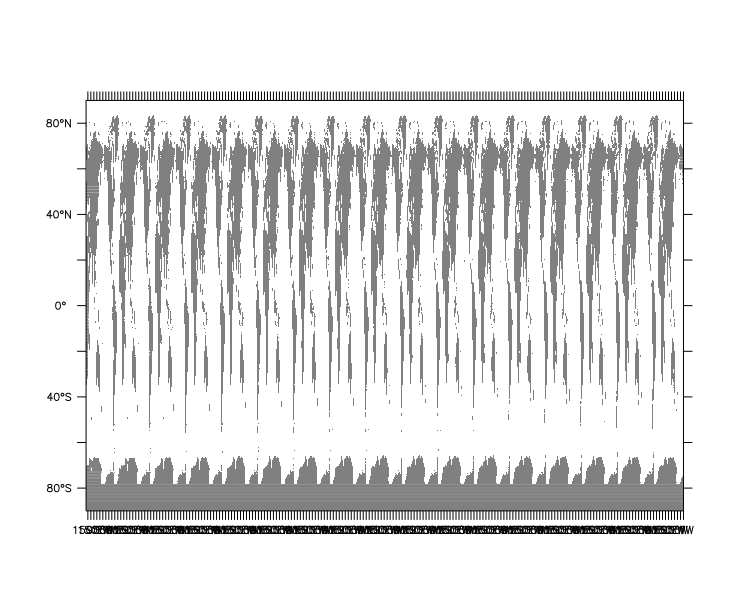

In [28]:
%%ferret
plot /title="500 Year Warming Run" SALT[I=@MAX,J=@MAX,l=@SBX:12,k=20,d=4];go fland 